### Which one is the best Chinese restaurant in Chicago?
#### Looking for the best Chinese food in Chinatown, Chicago? Here you go!

##### Use python clustering to find the best Chinese food in Chinatown

In [2]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [3]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Sol

In [70]:
#use Foursquare to start searching from Chinatown Public Library

CLIENT_ID = 'FGFCFYA0SGRENHRU2APBKROZINS3CP4UNS1K51PPVXRMMUWO' # your Foursquare ID
CLIENT_SECRET = 'ZEM5H4OXUMXYH0DPSP44OTYJMT5BGDSWCRDJ5NELJPIY4VIB' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

address = '2100 S Wentworth Ave, Chicago, IL 60616, United States'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Chinatown Public Library:',latitude, longitude)

Your credentails:
CLIENT_ID: FGFCFYA0SGRENHRU2APBKROZINS3CP4UNS1K51PPVXRMMUWO
CLIENT_SECRET:ZEM5H4OXUMXYH0DPSP44OTYJMT5BGDSWCRDJ5NELJPIY4VIB
Chinatown Public Library: 41.85383525 -87.63216490649344


In [71]:
search_query = 'Chinese'+'Restaurant'
radius = 300
print(search_query + ' ... done!')

ChineseRestaurant ... done!


In [72]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=FGFCFYA0SGRENHRU2APBKROZINS3CP4UNS1K51PPVXRMMUWO&client_secret=ZEM5H4OXUMXYH0DPSP44OTYJMT5BGDSWCRDJ5NELJPIY4VIB&ll=41.85383525,-87.63216490649344&v=20180604&query=ChineseRestaurant&radius=300&limit=50'

In [58]:
#request for results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8e9d21d03993001bb09a10'},
 'response': {'venues': [{'id': '57476c6acd102ac356bcc850',
    'name': 'Chef Bao Chinese Restaurant',
    'location': {'address': '2230 S Wentworth Ave',
     'lat': 41.85195375570797,
     'lng': -87.63222098350525,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.85195375570797,
       'lng': -87.63222098350525}],
     'distance': 209,
     'postalCode': '60616',
     'cc': 'US',
     'city': 'Chicago',
     'state': 'IL',
     'country': 'United States',
     'formattedAddress': ['2230 S Wentworth Ave',
      'Chicago, IL 60616',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586404723',
    'hasPerk': False},
   {'id

In [73]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.formattedAddress,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,57476c6acd102ac356bcc850,Chef Bao Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1586404723,False,2230 S Wentworth Ave,41.851954,-87.632221,"[{'label': 'display', 'lat': 41.85195375570797...",209,...,"[2230 S Wentworth Ave, Chicago, IL 60616, Unit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4bd62e20637ba59325d8f770,Great Wall Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1586404723,False,2127 S China Pl,41.854096,-87.633142,"[{'label': 'display', 'lat': 41.85409562301815...",86,...,"[2127 S China Pl, Chicago, IL 60616, United St...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4b6a36b2f964a52070cd2be3,Mayflower,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1586404723,False,2225 S Wentworth Ave,41.852175,-87.631946,"[{'label': 'display', 'lat': 41.85217452331145...",185,...,"[2225 S Wentworth Ave, Chicago, IL 60616, Unit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4a7ca70df964a5201aed1fe3,Ken Kee Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1586404723,False,2129 S China Pl,41.854014,-87.633196,"[{'label': 'display', 'lat': 41.85401351870805...",87,...,[2129 S China Pl (btwn Wells St & Princeton Av...,btwn Wells St & Princeton Ave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f74aae3e4b0f112e194fdc9,Chinese American Veteran's Memorial,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1586404723,False,NaN,41.852700,-87.634570,"[{'label': 'display', 'lat': 41.8527002073377,...",236,...,"[Cermak and Archer, Chicago, IL 60616, United ...",Cermak and Archer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df['categories'] = df.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df.columns = [column.split('.')[-1] for column in df.columns]

df.drop(['crossStreet', 'neighborhood'], axis=1, inplace=True)
df.drop(['formattedAddress'], axis=1, inplace=True)
df.drop(['labeledLatLngs'], axis=1, inplace=True)
df.drop(['postalCode', 'cc','city','state','country'], axis=1, inplace=True)
df.head()

,name,categories,address,lat,lng,distance,id
0,Chef Bao Chinese Restaurant,Chinese Restaurant,2230 S Wentworth Ave,41.851954,-87.632221,209,57476c6acd102ac356bcc850
1,Great Wall Restaurant,Chinese Restaurant,2127 S China Pl,41.854096,-87.633142,86,4bd62e20637ba59325d8f770
2,Mayflower,Chinese Restaurant,2225 S Wentworth Ave,41.852175,-87.631946,185,4b6a36b2f964a52070cd2be3
3,Ken Kee Restaurant,Chinese Restaurant,2129 S China Pl,41.854014,-87.633196,87,4a7ca70df964a5201aed1fe3
4,Chinese American Veteran's Memorial,Building,NaN,41.852700,-87.634570,236,4f74aae3e4b0f112e194fdc9


In [158]:
#count the number of chinese restaurant within radius
df.values.tolist()
df.to_dict()
df['categories'].value_counts()


Chinese Restaurant      24
Asian Restaurant         4
Food                     4
Gift Shop                2
Church                   2
Building                 2
Korean Restaurant        1
Dim Sum Restaurant       1
Cantonese Restaurant     1
Thai Restaurant          1
History Museum           1
Boutique                 1
Non-Profit               1
Hotel                    1
Name: categories, dtype: int64

In [165]:
#find Chinese restaurants only and sort by distance
dfC = df[df['categories'].str.contains("Chinese")]
dfC = dfC.sort_values(by ='distance' )
dfC

,name,categories,address,lat,lng,distance,id
11,Cantonesia Restaurant,Chinese Restaurant,204 W Cermak Rd,41.853154,-87.632107,75,4b5f55aaf964a520a7b429e3
1,Great Wall Restaurant,Chinese Restaurant,2127 S China Pl,41.854096,-87.633142,86,4bd62e20637ba59325d8f770
3,Ken Kee Restaurant,Chinese Restaurant,2129 S China Pl,41.854014,-87.633196,87,4a7ca70df964a5201aed1fe3
7,My Place Chinese Cuisine,Chinese Restaurant,2022 S Wentworth Ave,41.854626,-87.632556,93,50bba610e4b09c65432edb2e
20,Little lamb restaurant,Chinese Restaurant,NaN,41.852948,-87.631846,102,54a590b6498e51ca1d812128
19,Moon Palace Restaurant,Chinese Restaurant,216 W Cermak Rd,41.852915,-87.632311,103,4b3e5aeaf964a520cc9b25e3
24,Emerald City,Chinese Restaurant,218 W Cermak Rd,41.852947,-87.632691,108,4c34f488a0ced13a040e196e
18,Three Happiness,Chinese Restaurant,209 W Cermak Rd,41.852815,-87.632326,114,4b5b5141f964a5201cf428e3
31,Yan Bang Cai,Chinese Restaurant,228 W Cermak Rd,41.852888,-87.633018,126,51f3ef808bbdec0dcf323d80
28,Tientsin Restaurant,Chinese Restaurant,2002 S Wentworth Ave,41.855029,-87.631981,133,59bec36d135b3922e9bf85b0


In [399]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Chinatown Public Library

# add a blue circle marker to represent the Library
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='blue',
    popup='Chinatown Public Library',
    fill = True,
    fill_color = 'blue',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Chinese restaurants as green circle markers
for lat, lng, label in zip(dfC.lat, dfC.lng, dfC.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [160]:
#find data type
dfC.dtypes

name           object
categories     object
address        object
lat           float64
lng           float64
distance        int64
id             object
dtype: object

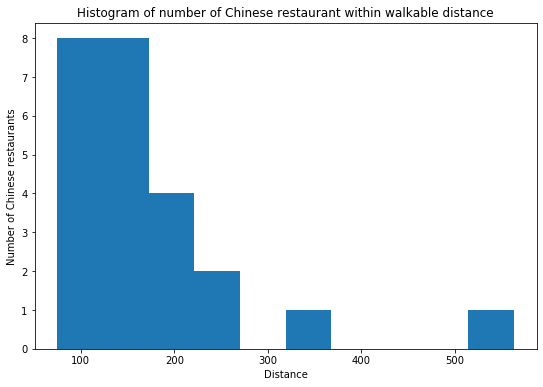

In [167]:
# plot histogram of number of Chinese restaurant within walkable distance
dfC['distance'].plot(kind='hist', figsize=(9, 6))

plt.title('Histogram of number of Chinese restaurant within walkable distance') # add a title to the histogram
plt.ylabel('Number of Chinese restaurants') # add y-label
plt.xlabel('Distance') # add x-label
plt.show()


In [196]:
#find the restaurant within distance 120m
dfC['distance'] = dfC[dfC['distance']<120]['distance']
dfC120=dfC.dropna()
dfC120

,name,categories,address,lat,lng,distance,id
11,Cantonesia Restaurant,Chinese Restaurant,204 W Cermak Rd,41.853154,-87.632107,75.0,4b5f55aaf964a520a7b429e3
1,Great Wall Restaurant,Chinese Restaurant,2127 S China Pl,41.854096,-87.633142,86.0,4bd62e20637ba59325d8f770
3,Ken Kee Restaurant,Chinese Restaurant,2129 S China Pl,41.854014,-87.633196,87.0,4a7ca70df964a5201aed1fe3
7,My Place Chinese Cuisine,Chinese Restaurant,2022 S Wentworth Ave,41.854626,-87.632556,93.0,50bba610e4b09c65432edb2e
19,Moon Palace Restaurant,Chinese Restaurant,216 W Cermak Rd,41.852915,-87.632311,103.0,4b3e5aeaf964a520cc9b25e3
24,Emerald City,Chinese Restaurant,218 W Cermak Rd,41.852947,-87.632691,108.0,4c34f488a0ced13a040e196e
18,Three Happiness,Chinese Restaurant,209 W Cermak Rd,41.852815,-87.632326,114.0,4b5b5141f964a5201cf428e3


In [197]:
#convert to csv
dfC120.to_csv('Chinese_Restaurant')

In [198]:
#make into index
dfC120i= dfC120.set_index('name')
dfC120i

,categories,address,lat,lng,distance,id
name,,,,,,
Cantonesia Restaurant,Chinese Restaurant,204 W Cermak Rd,41.853154,-87.632107,75.0,4b5f55aaf964a520a7b429e3
Great Wall Restaurant,Chinese Restaurant,2127 S China Pl,41.854096,-87.633142,86.0,4bd62e20637ba59325d8f770
Ken Kee Restaurant,Chinese Restaurant,2129 S China Pl,41.854014,-87.633196,87.0,4a7ca70df964a5201aed1fe3
My Place Chinese Cuisine,Chinese Restaurant,2022 S Wentworth Ave,41.854626,-87.632556,93.0,50bba610e4b09c65432edb2e
Moon Palace Restaurant,Chinese Restaurant,216 W Cermak Rd,41.852915,-87.632311,103.0,4b3e5aeaf964a520cc9b25e3
Emerald City,Chinese Restaurant,218 W Cermak Rd,41.852947,-87.632691,108.0,4c34f488a0ced13a040e196e
Three Happiness,Chinese Restaurant,209 W Cermak Rd,41.852815,-87.632326,114.0,4b5b5141f964a5201cf428e3


In [120]:
# Find ratings for 
name='Cantonesia Restaurant'
venue_id = '4b5f55aaf964a520a7b429e3' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(name)
    print(result['response']['venue']['rating'])
except:
    print('has not been rated yet.')

Cantonesia Restaurant
has not been rated yet.


In [119]:
# Find ratings for 
name='Seven Treasures Cantonese Restaurant'
venue_id = '4bd62e20637ba59325d8f770'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(name)
    print(result['response']['venue']['rating'])
except:
    print('has not been rated yet.')

Seven Treasures Cantonese Restaurant
5.6


In [126]:
# Find ratings for 
name= 'Ken Kee Restaurant'
venue_id = '4a7ca70df964a5201aed1fe3'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(name)
    print(result['response']['venue']['rating'])
except:
     print('has not been rated yet.')

Ken Kee Restaurant
6.2


In [127]:
# Find ratings for 
name='Moon Palace Restaurant'
venue_id = '50bba610e4b09c65432edb2e'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(name)
    print(result['response']['venue']['rating'])
except:
     print('has not been rated yet.')

My Place Chinese Cuisine
6.3


In [170]:
# Find ratings for 
name='My Place Chinese Cuisine'
venue_id = '4b3e5aeaf964a520cc9b25e3'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(name)
    print(result['response']['venue']['rating'])
except:
     print('has not been rated yet.')

My Place Chinese Cuisine
7.3


In [173]:
# Find ratings for 
name='Emerald City'
venue_id = '4c34f488a0ced13a040e196e'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(name)
    print(result['response']['venue']['rating'])
except:
     print('has not been rated yet.')

Emerald City
has not been rated yet.


In [174]:
# Find ratings for 
name='Three Happiness'
venue_id = '4b5b5141f964a5201cf428e3'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(name)
    print(result['response']['venue']['rating'])
except:
     print('has not been rated yet.')

Three Happiness
7.0


In [204]:
#Insert ratings into restaurants and sort ratings by desending order
ratings =[0,5.6,6.2,6.3,7.3,0,7.0]
dfC120i['ratings']=ratings
dfCR= dfC120i.sort_values(by ='ratings',ascending=False)
dfCR

,categories,address,lat,lng,distance,id,ratings
name,,,,,,,
Moon Palace Restaurant,Chinese Restaurant,216 W Cermak Rd,41.852915,-87.632311,103.0,4b3e5aeaf964a520cc9b25e3,7.3
Three Happiness,Chinese Restaurant,209 W Cermak Rd,41.852815,-87.632326,114.0,4b5b5141f964a5201cf428e3,7.0
My Place Chinese Cuisine,Chinese Restaurant,2022 S Wentworth Ave,41.854626,-87.632556,93.0,50bba610e4b09c65432edb2e,6.3
Ken Kee Restaurant,Chinese Restaurant,2129 S China Pl,41.854014,-87.633196,87.0,4a7ca70df964a5201aed1fe3,6.2
Great Wall Restaurant,Chinese Restaurant,2127 S China Pl,41.854096,-87.633142,86.0,4bd62e20637ba59325d8f770,5.6
Cantonesia Restaurant,Chinese Restaurant,204 W Cermak Rd,41.853154,-87.632107,75.0,4b5f55aaf964a520a7b429e3,0.0
Emerald City,Chinese Restaurant,218 W Cermak Rd,41.852947,-87.632691,108.0,4c34f488a0ced13a040e196e,0.0


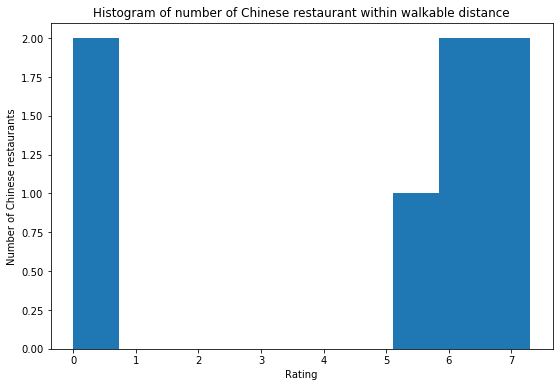

In [400]:
# plot histogram of number of Chinese restaurant within walkable distance
dfCR['ratings'].plot(kind='hist', figsize=(9, 6))

plt.title('Histogram of number of Chinese restaurant within walkable distance') # add a title to the histogram
plt.ylabel('Number of Chinese restaurants') # add y-label
plt.xlabel('Rating') # add x-label
plt.show()


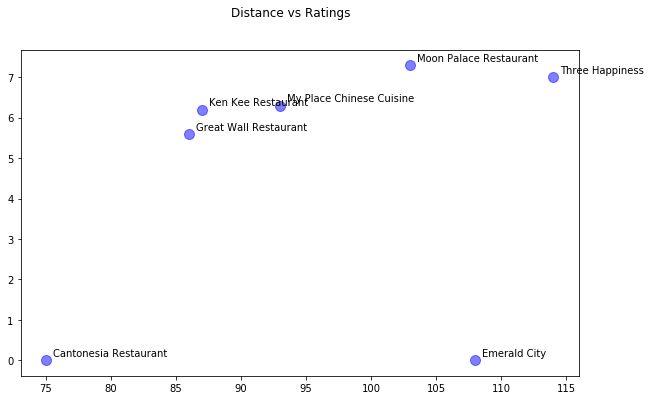

In [402]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom

#Use scatter plot to show ratings versus distance
x =dfCR['distance']
y =dfCR['ratings']
name=["Moon Palace Restaurant", "Three Happiness", "My Place Chinese Cuisine", "Ken Kee Restaurant", 
      "Great Wall Restaurant", "Cantonesia Restaurant", "Emerald City"]

# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Distance vs Ratings')


# Plot the scatter points
ax.scatter(x, y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

# Add the participant names as text labels for each point
for x, y, name in zip(x, y, name):
    ax.annotate(name,             # The label for this point
                xy=(x, y), # Position of the corresponding point
                xytext=(7, 7),     # Offset text by 7 points to the right, 
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# Show the plot
pltDFCR=plt.show()
pltDFCR

In [403]:
#Ask if the person is asking for Chinese food and reply


if input("Are you in mood of Chinese food? YES/NO ").upper()=='YES':
    print("Good, let's start")

    if input("By what method? Distance/Rating").upper()=='DISTANCE':
        print("Good, here you go the suggested resaurants by distance")
        print(dfCD[['distance']])
    
    elif input("By what method? Distance/Rating").upper()=='RATING':
        print("Sure, here you go the suggested resaurants by rating")
        print(dfCR[['ratings']])

else:
    print("Please refer to Google Map for help!") 




Are you in mood of Chinese food? YES/NO  YES


Good, let's start


By what method? Distance/Rating Distance


Good, here you go the suggested resaurants by distance
                          distance
name                              
Three Happiness              114.0
Emerald City                 108.0
Moon Palace Restaurant       103.0
My Place Chinese Cuisine      93.0
Ken Kee Restaurant            87.0
Great Wall Restaurant         86.0
Cantonesia Restaurant         75.0
